# The Spark Foundation

### Topic: Data Science and Business Analyst
### Author: Satya Reddy

# K-means Clustering

Overview:Iris is dataset with four numerical columns and one categorical column defining dimensions and species. Here we would like to know what would be optimum number of clusters and visualise the clusters.
The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modeling
4. Modeling
5. Final visualization

## 1. Read and understand the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
#read the dataset
iris_df = pd.read_csv("iris.csv")

In [3]:
# basic information on dataset
iris_df.shape

(150, 6)

In [4]:
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Modelling


In [6]:
x = iris_df.iloc[:, [1, 2, 3,4]].values


In [7]:
print(x)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Finding the Optimal number of Clusters

### SSD/Elbow curve

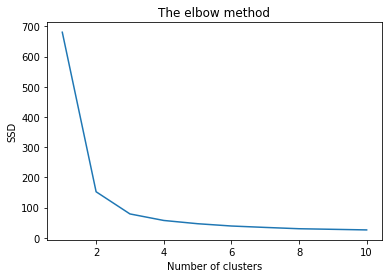

In [8]:
# Finding the Optimal number of clusters for k-means classification
SSD = [] 

for num_clusters in range(1,11):
    
    kmeans = KMeans(n_clusters=num_clusters,max_iter=300)
    kmeans.fit(x)
    
    SSD.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range(1,11),SSD)

plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSD') # Within cluster sum of squares
plt.show()

-- As we see from above graph at cluster 3 is where the elbow occurs 
-- Also after cluster 3, adding another cluster does not reduce the value of SSD by a significant number and so there is no point adding another cluster and we can stick to 3 clusters

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(x)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.6808136202936816
For n_clusters=3, the silhouette score is 0.5525919445499756
For n_clusters=4, the silhouette score is 0.49722797266401464
For n_clusters=5, the silhouette score is 0.48851755088862786
For n_clusters=6, the silhouette score is 0.36650401502359636
For n_clusters=7, the silhouette score is 0.35606622424763756
For n_clusters=8, the silhouette score is 0.35173499014796294
For n_clusters=9, the silhouette score is 0.32102057037642007
For n_clusters=10, the silhouette score is 0.3209565169455164
For n_clusters=11, the silhouette score is 0.3193876671403521


Silhouette score for 2 clusters is 68, and for three clusters it is 55 and keeps reducing.
From mathematical view 2 clusters may be optimal, but 2 might not be the most optimal number from a segmentation point of view. So going for 3 clusters would be best option. 

In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)



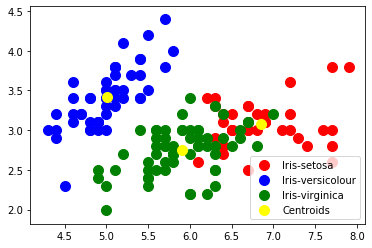

In [12]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [13]:
iris_predictors = pd.DataFrame(iris_df.iloc[:, [0, 1, 2, 3,4]]) 

In [14]:
# assign the label
iris_predictors['cluster_id'] = y_kmeans
iris_predictors.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


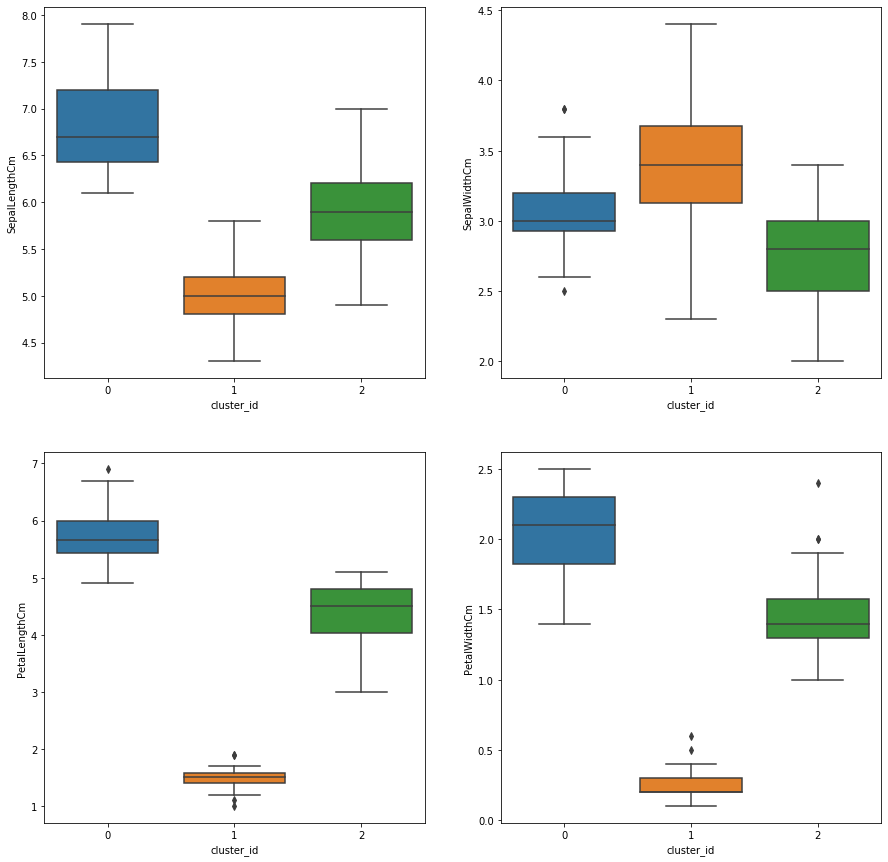

In [19]:
# plot
plt.figure(figsize=[15,15])
plt.subplot(2,2,1)
sns.boxplot(x='cluster_id', y='SepalLengthCm', data=iris_predictors)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_id', y='SepalWidthCm', data=iris_predictors)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_id', y='PetalLengthCm', data=iris_predictors)
plt.subplot(2,2,4)
sns.boxplot(x='cluster_id', y='PetalWidthCm', data=iris_predictors)

# Thank You